### Base Risco de Crédito - Naive Bayes

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Algoritmo Naive Bayes - menos complexo
import pickle 

In [10]:
base_risco_credito = pd.read_csv('../Arquivos/risco_credito.csv')
display(base_risco_credito)

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


##### Variáveis de classe e variáveis previsoras

In [12]:
x_risco_credito = base_risco_credito.iloc[:, 0:4].values  # Atributos previsores
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [13]:
y_risco_credito = base_risco_credito.iloc[:, 4].values  # Atributos de classe
y_risco_credito  

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

##### Conversão de atributos categóricos para númericos

In [15]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [17]:
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[: ,0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[: ,1])
x_risco_credito[:, 2] = label_encoder_garantia.fit_transform(x_risco_credito[: ,2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[: ,3])

x_risco_credito
# Por ser pequena, não precisamos usar o OneHotEncoder
# Para fins de teste

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [18]:
# Transformando a base de dados ja tratada em arquivo pkl

with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

##### Usando o algoritmo

In [23]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)  # Encaixando o algoritmo na base de dados - Gerando a tabela de dados aprendida anteriormente (treinando)
# parametros: (atributos_previsores, classes)

GaussianNB()

##### Previsão

In [26]:
# OBS: A correção laplaciana é feita automaticamente pela biblioteca

# Dados dos "cliente" que iremos prever:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), divida alta (0), garant ias adequada (0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [28]:
display(previsao)  # Resultado de acordo com o atributo classe (baixo, alto, moderado)

array(['baixo', 'moderado'], dtype='<U8')

In [30]:
naive_risco_credito.classes_  # Variáveis do atributo classe

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [31]:
naive_risco_credito.class_count_  # Quantidade de ocorrencia de cada variável classe

array([6., 5., 3.])

### Base Credit Data - Naive Bayes

##### Importando os dados já tratados do último modulo da base de dados credit

In [34]:
with open('../01_Pré Processamento dos dados/credit.pkl', 'rb') as f:  # 'rb' para abrir o arquivo, 'wb' para criar
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [36]:
x_credit_treinamento.shape, y_credit_treinamento.shape  # Os _treinamentos são os dados que iremos usar para treinar o algoritmo naive bayes
# Atributos previsores, atributos classe

((1500, 3), (1500,))

In [37]:
x_credit_teste.shape, y_credit_teste.shape  # _teste dados que iremos testar o algoritmo

((500, 3), (500,))

##### Treinamento com o algoritmo

In [42]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)  # Gerando a tabela de probabilidade (treinando)

GaussianNB()

In [45]:
previsoes = naive_credit_data.predict(x_credit_teste)  # Gerou os resultados classe a partir do treinamento feito acima
display(previsoes)

# cada 0 e cada 1 são a resposta do algoritmo de acordo com cada dado do dataframe de treinamento

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

##### Comparando com os dados reais

In [50]:
from sklearn.metrics import accuracy_score  # Função para verificar se X matriz é igual a Y matriz
from sklearn.metrics import confusion_matrix  

accuracy_score(y_credit_teste, previsoes)  # Vendo se a previsão feita pelo algoritmo bate com os reais resultados  ->  93% de acerto
confusion_matrix(y_credit_teste, previsoes)  # Demonstrar em números os clientes que pagariam o emprestimo e se está certo (erros)

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [53]:
# pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix  

0.938

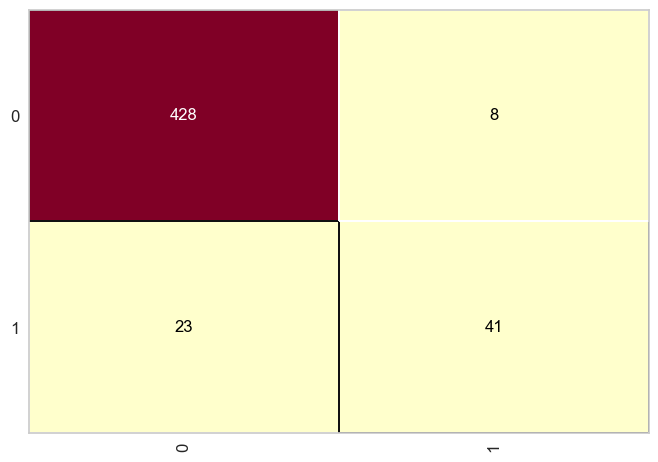

In [55]:
# Treinando e interpretando os erros e acertos do algoritmo

cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

# Analisar as intersecções: sendo 0: clientes  pagam, e 1: clientes que não pagam
# temos: 428 acertos desses clientes que pagam pelo algoritmo, 8 clientes que pagam errado pelo algoritmo (falou que 8 pagam, mas não pagam)
# 41 que não pagam acertado pelo algoritmo e 23 que não pagam errado pelo algoritmo (falou que 23 não pagam, mas pagam)

In [57]:
from sklearn.metrics import classification_report  # Algumas métricas a mais

print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Census - Naive Baye

In [60]:
# importando já tratado:

with open('../01_Pré Processamento dos dados/census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [63]:
x_census_treinamento.shape, y_census_treinamento.shape
# x -> previsores  y -> atributos classe

((27676, 108), (27676,))

In [65]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [68]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)

GaussianNB()

In [71]:
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

##### Comparando o teste do algoritmo com o resultado do algoritmo:

In [74]:
accuracy_score(y_census_teste, previsoes)  # 47%

0.4767656090071648

0.4767656090071648

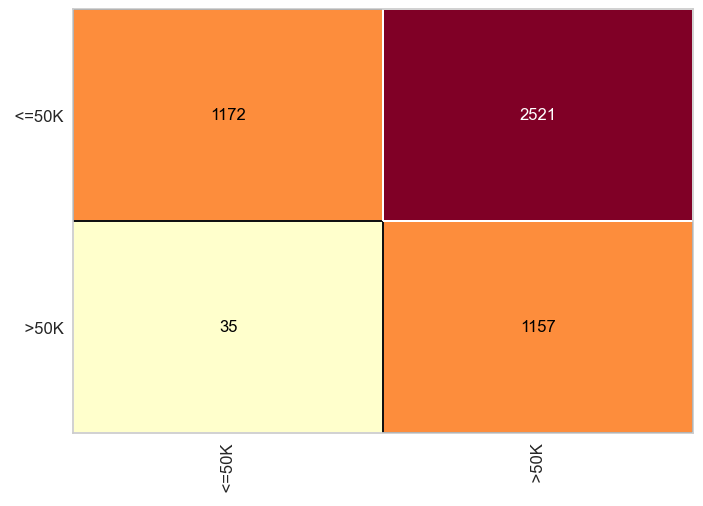

In [77]:
# Fazendo o accurate

cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

# Vemos aqui que:
# De acordo com o algoritmo 2521 clientes (dados) ganham <= 50k, mas não ganham
# E que 35 clientes ganham <= 50k, mas não ganham

In [79]:
print(classification_report(y_census_teste, previsoes))

# O algorimo a chou 97% das pessoas que ganham mais de 50k
# Mas achou apenas 32% das pessoas que ganham menos de 50k

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

